# Feature importances
Here, we will use SHAP to determine the feature importances of the model. Due to time constrains, we only use a small sample of the data.

Due to incompatibilities between SHAP and the model used, the departure, arrival and airport_pair features are not included in the analysis.

In [1]:
import shap
import pickle
import pandas as pd
import numpy as np

from create_Xy import get_data
from data_augmentation import get_constructor

In [2]:
data = get_data("challenge_set")
constructor = get_constructor("shap")
X = data.drop("tow", axis=1)
y = data["tow"]
X = constructor.fit_transform(X)

# Get sample of data
X_sample = X.sample(250, random_state=42)

In [3]:
with open('pipeline_shap.pkl', 'rb') as f:
    pipeline = pickle.load(f)

In [4]:
if isinstance(X_sample, np.ndarray):
    feature_names = pipeline[:-1].get_feature_names_out()
    X_sample = pd.DataFrame(X_sample, columns=feature_names)

def model_predict(data):
    return pipeline[-1].predict(data)

explainer = shap.KernelExplainer(model_predict, X_sample)

shap_values = explainer.shap_values(X_sample, nsamples=110)

## Total SHAP values
Below are the total SHAP values for each feature. The Maximum Takeoff Mass (mtom) is the most important feature, followed by the aircraft type and the Operating Empty Weight (oew). As expected, both MTOM and OEW correlate positvely with Takeoff weight.

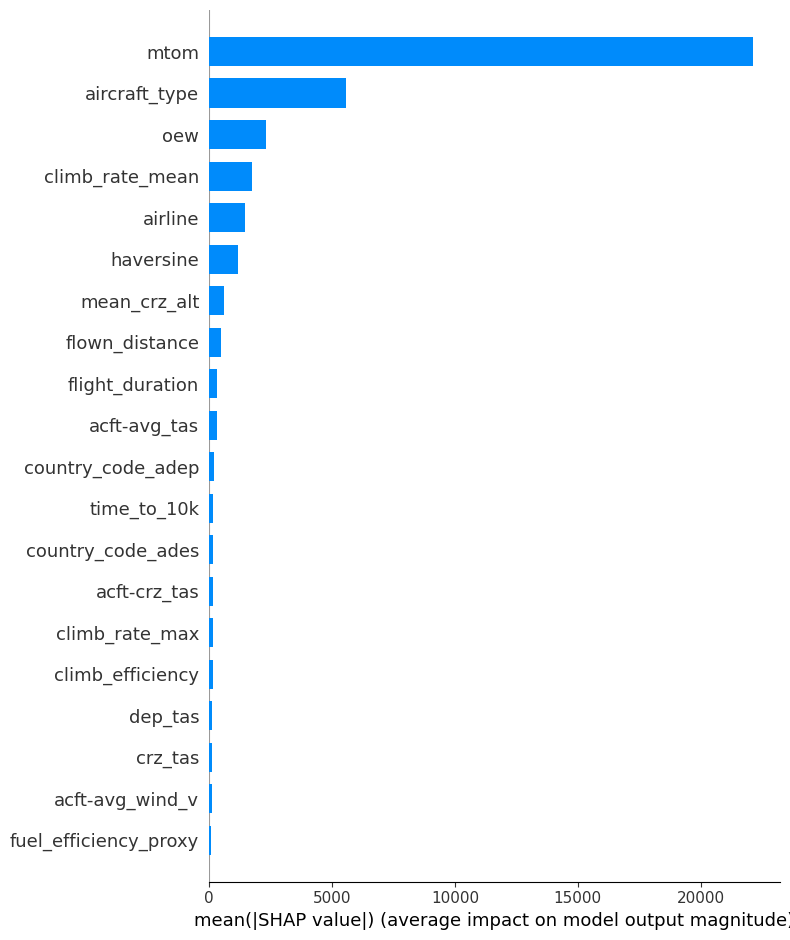

In [23]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

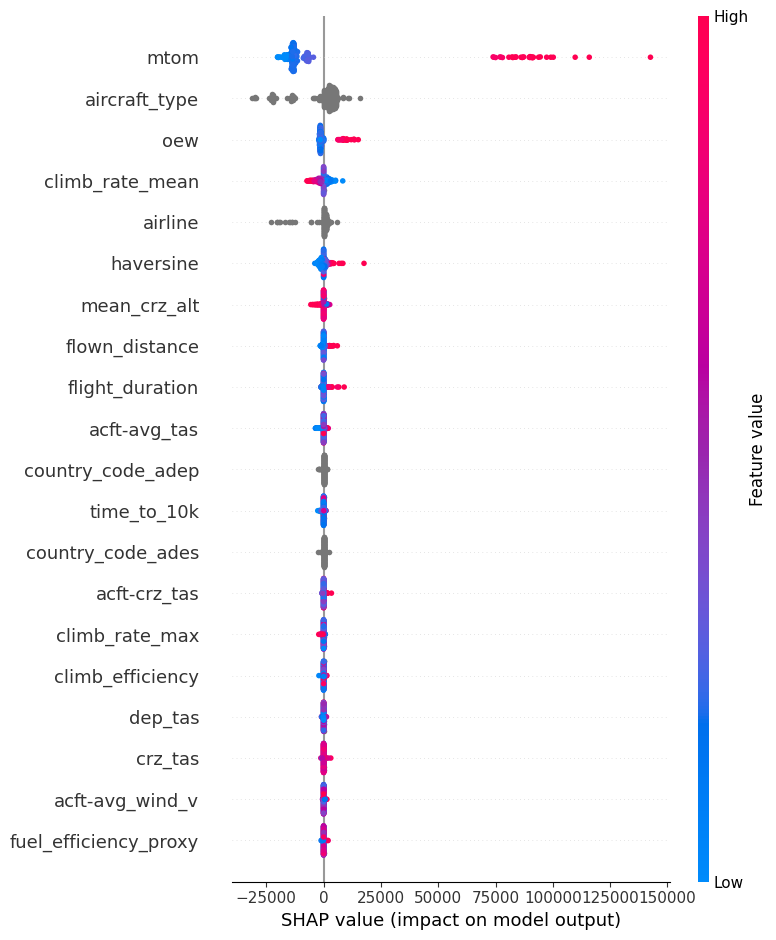

In [8]:
shap.summary_plot(shap_values, X_sample)

## Other features
As the SHAP values mentioned above dominate the plot, we remove them in the following plots to see the other features. 

The climb rate mean is the most important feature after the dominant features, correlating negatively with Takeoff weight. The airline and haversine features are also important.

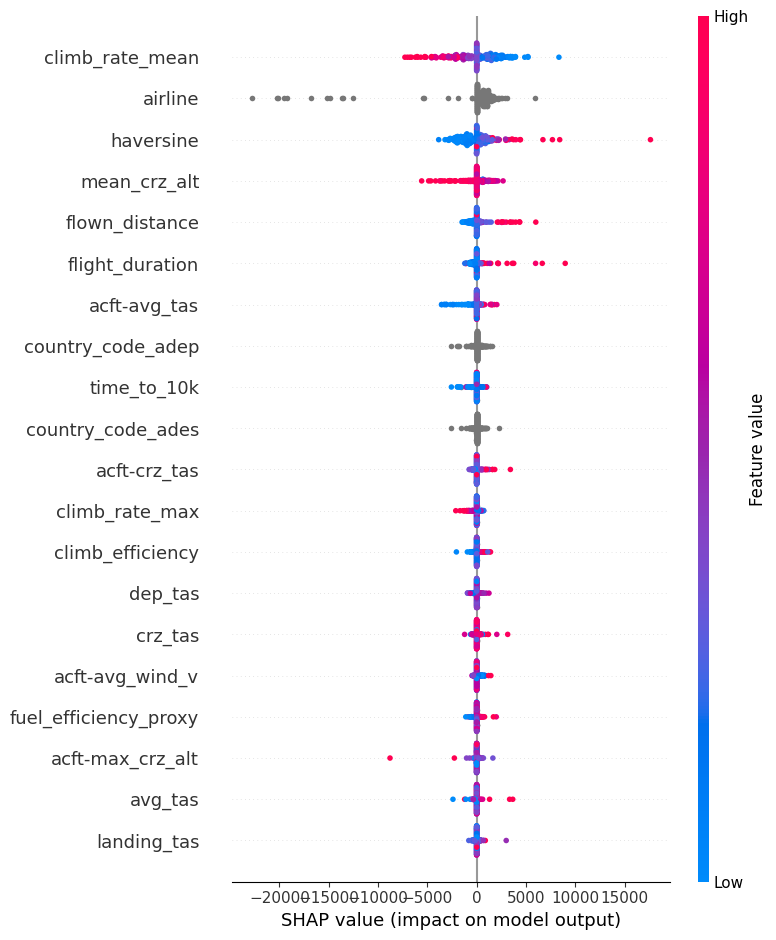

In [15]:
dominant_features = ["mtom", "aircraft_type", "oew"]

dominant_feature_indices = [list(X_sample.columns).index(feature) for feature in dominant_features]

X_sample_reduced = X_sample.drop(columns=dominant_features)
shap_values_reduced = shap_values[:, [i for i in range(shap_values.shape[1]) if i not in dominant_feature_indices]]

shap.summary_plot(shap_values_reduced, X_sample_reduced)

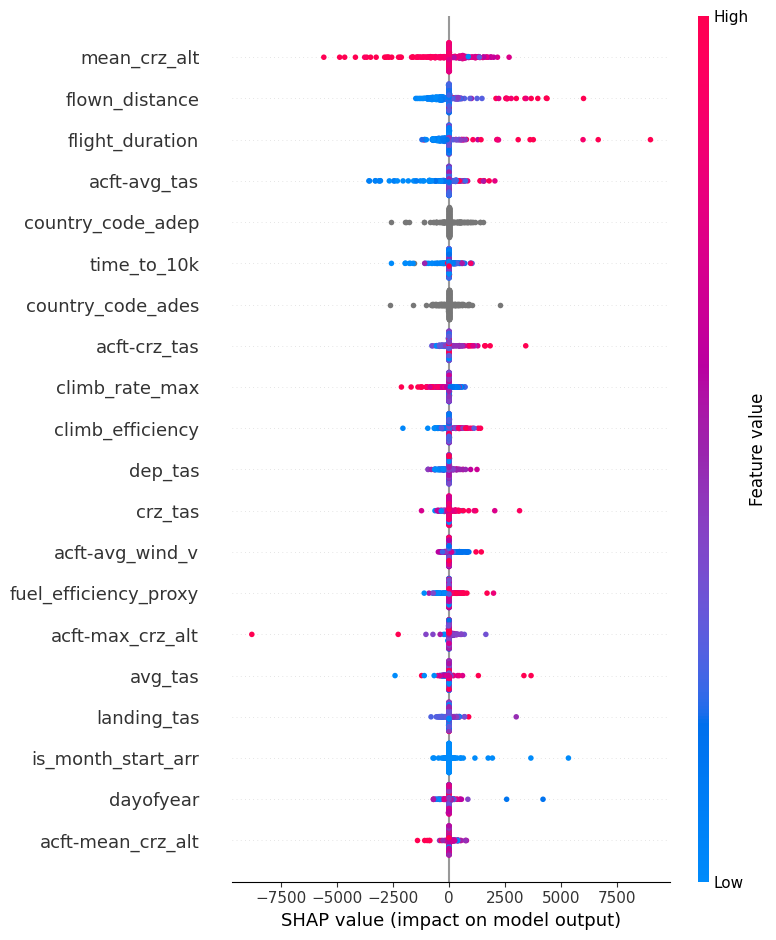

In [20]:
dominant_features = ["mtom", "aircraft_type", "oew", "climb_rate_mean", "airline", "haversine"]

dominant_feature_indices = [list(X_sample.columns).index(feature) for feature in dominant_features]

X_sample_reduced = X_sample.drop(columns=dominant_features)
shap_values_reduced = shap_values[:, [i for i in range(shap_values.shape[1]) if i not in dominant_feature_indices]]